In [1]:
import SimpleITK as sitk
import numpy as np

In [2]:
import os
ROOT_DIR = "/pylon5/ac5616p/Data/HeartSegmentationProject/CAP_challenge/CAP_challenge_training_set/test2/ants"
os.chdir(ROOT_DIR)

In [133]:
fixed_image=sitk.ReadImage('fixed.nii')
moving_image=sitk.ReadImage('moving.nii')
new_array=np.zeros((256, 256, 256))
index_on_fixed=[113,89,112]
new_array[index_on_fixed[0],index_on_fixed[1],index_on_fixed[2]]=200
new_array[index_on_fixed[0]+1,index_on_fixed[1],index_on_fixed[2]]=200
new_array[index_on_fixed[0],index_on_fixed[1]+1,index_on_fixed[2]]=200
new_array[index_on_fixed[0],index_on_fixed[1],index_on_fixed[2]+1]=200
new_array[index_on_fixed[0]+1,index_on_fixed[1]+1,index_on_fixed[2]]=200
new_array[index_on_fixed[0]+1,index_on_fixed[1],index_on_fixed[2]+1]=200
new_array[index_on_fixed[0],index_on_fixed[1]+1,index_on_fixed[2]+1]=200
new_array[index_on_fixed[0]+1,index_on_fixed[1]+1,index_on_fixed[2]+1]=200
new_image=sitk.GetImageFromArray(new_array)
new_image.CopyInformation(fixed_image)
print(new_image)

Image (0x5556681c02c0)
  RTTI typeinfo:   itk::Image<double, 3u>
  Reference Count: 1
  Modified Time: 11610
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 256]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 256]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 256]
  Spacing: [1, 1, 1]
  Origin: [-138.67, 117.885, 98.6247]
  Direction: 
1 -8.3819e-09 -8.3819e-09
-8.3819e-09 -0 -1
-8.3819e-09 -1 3.51282e-17

  IndexToPointMatrix: 
1 -8.3819e-09 -8.3819e-09
-8.3819e-09 -0 -1
-8.3819e-09 -1 3.51282e-17

  PointToIndexMatrix: 
1 -8.3819e-09 -8.3819e-09
-8.3819e-09 3.51282e-17 -1
-8.3819e-09 -1 3.51282e-17

  Inverse Direction: 
1 -8.3819e-09 -8.3819e-09
-8.3819e-0

In [134]:
sitk.WriteImage(new_image, 'new.nii')

In [135]:
!antsApplyTransforms -d 3 -i new.nii -o new_deformed.nii -r moving.nii -t [brain0GenericAffine.mat, 1] -t transInverseWarp.nii.gz -n NearestNeighbor






In [136]:
new_deformed=sitk.ReadImage('new_deformed.nii')

In [137]:
new_deformed_array=sitk.GetArrayFromImage(new_deformed)
print(new_deformed_array.sum())
index_on_moving=[new_deformed_array.sum(axis=(1,2)).argmax(), new_deformed_array.sum(axis=(0,2)).argmax(), new_deformed_array.sum(axis=(0,1)).argmax()]
index_on_fixed_check=[new_array.sum(axis=(1,2)).argmax(), new_array.sum(axis=(0,2)).argmax(), new_array.sum(axis=(0,1)).argmax()]

print('index_on_fixed', index_on_fixed)
print('index_on_moving', index_on_moving)
print('index_on_fixed_check', index_on_fixed_check)

800.0
index_on_fixed [113, 89, 112]
index_on_moving [123, 88, 112]
index_on_fixed_check [113, 89, 112]


In [138]:
fixed_array=sitk.GetArrayFromImage(fixed_image)
moving_array=sitk.GetArrayFromImage(moving_image)

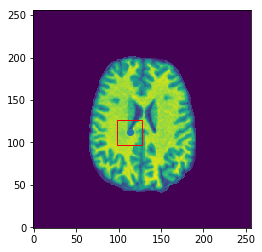

In [139]:
import matplotlib.pyplot as plt
from matplotlib import patches 
fig,ax=plt.subplots(1)

ax.imshow(fixed_array[:,index_on_fixed[1],:],origin="lower")
rect=patches.Rectangle((index_on_fixed[0]-15,index_on_fixed[2]-15),30,30,facecolor='none',edgecolor='r')
plt.plot(index_on_fixed[0],index_on_fixed[2],'o')
ax.add_patch(rect)
plt.show()

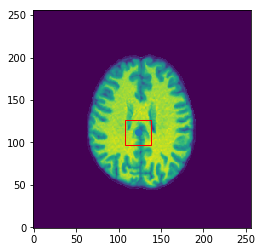

In [140]:
fig,ax=plt.subplots(1)

ax.imshow(moving_array[:,index_on_moving[1],:],origin="lower")
rect=patches.Rectangle((index_on_moving[0]-15,index_on_moving[2]-15),30,30,facecolor='none',edgecolor='r')
plt.plot(index_on_moving[0],index_on_moving[2],'o')
ax.add_patch(rect)
plt.show()

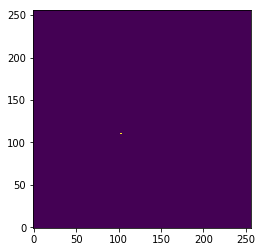

In [129]:
fig,ax=plt.subplots(1)
ax.imshow(new_array[:,index_on_fixed[1],:],origin="lower")
# rect=patches.Rectangle((index_on_fixed[0]-15,index_on_fixed[2]-15),30,30,facecolor='none',edgecolor='r')
# plt.plot(index_on_fixed[0],index_on_fixed[2],'o')
# ax.add_patch(rect)
plt.show()

In [132]:
new_array.max()

200.0

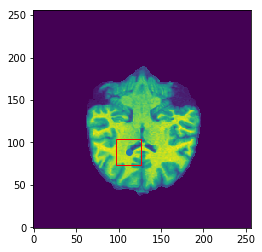

In [142]:
import matplotlib.pyplot as plt
from matplotlib import patches 
fig,ax=plt.subplots(1)

ax.imshow(numpy.flip(fixed_array[index_on_fixed[0],:,:], axis),origin="lower")
rect=patches.Rectangle((index_on_fixed[2]-15,index_on_fixed[1]-15),30,30,facecolor='none',edgecolor='r')
plt.plot(index_on_fixed[2],index_on_fixed[1],'o')
ax.add_patch(rect)
plt.show()